# Discrepancy

Author: Fred J. Hickernell + ChatGPT

#### Some LaTeX macros (hidden in math mode, will not render correctly in VS Code)
$
\newcommand{\vh}{\boldsymbol{h}}
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vz}{\boldsymbol{z}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\vU}{\boldsymbol{U}}
\newcommand{\vzero}{\boldsymbol{0}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cn}{\mathcal{N}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\cgp}{\mathcal{G}\!\mathcal{P}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\Prob}{\mathbb{P}}
\newcommand{\bbone}{\mathbb{1}}
\newcommand{\reals}{\mathbb{R}}
\newcommand{\disc}{\operatorname{disc}}
\newcommand{\norm}[2]{{\left \lVert #1 \right \rVert}_{#2}}
$

#### Run this notebook in Juypter with the `conda qmcpy` environment or [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/QMCSoftware/MATH565Fall2025/blob/main/notebooks/GeneratingRandomVectors.ipynb?flush_cache=true)

In [1]:
if "google.colab" in str(get_ipython()):
    print("⚡Note: Setup here can take a few minutes.")
    !apt-get -y install cm-super dvipng texlive-latex-extra texlive-latex-recommended
    !pip install git+https://github.com/QMCSoftware/QMCSoftware.git@develop
    !git clone https://github.com/QMCSoftware/MATH565Fall2025.git
    %cd MATH565Fall2025/notebooks
    print("\n✅ Colab setup complete.")
    print("   For faster performance, please install the qmcpy environment locally.")

### Import needed packages and initialize some parameters

In [2]:
import sys, time
import numpy as np, scipy as sp, matplotlib.pyplot as plt
import qmcpy as qp
from pathlib import Path
from tqdm import tqdm  # console style works everywhere
from IPython.display import display, Markdown
REPO_ROOT = Path.cwd().resolve().parent
sys.path.insert(0, str(REPO_ROOT))
from classlib.discrepancy import (mmd, mmd_prefix_against_measure, make_kernel, make_cd_kernel, restrict_to_unit_cube,
    AnalyticalMeasure, CDUniformMeasure, cd_uniform_k_mean, cd_uniform_k_self, show_mmd_usage)
import nbviz as nb
nb.init(use_tex=True)     # styling, Tol cycle, CSS
colors, TINY = nb.TOL_BRIGHT, nb.TINY

## Discrepancy
$$
\begin{aligned}
D^2\bigl(F_{\boldsymbol{X}},F_{\boldsymbol{Z}},K\bigr)
& = \int_{\mathcal{X} \times \mathcal{X}} K(\boldsymbol{x}, \boldsymbol{x}') \, \mathrm{d} F_{\boldsymbol{X}}(\boldsymbol{x})
\mathrm{d} F_{\boldsymbol{X}}(\boldsymbol{x}')
- 2 \int_{\mathcal{X} \times \mathcal{X}} K(\boldsymbol{x}, \boldsymbol{z}) \, \mathrm{d} F_{\boldsymbol{X}}(\boldsymbol{x})
\mathrm{d} F_{\boldsymbol{Z}}(\boldsymbol{z}) \\
& \qquad \qquad + \int_{\mathcal{X} \times \mathcal{X}}
K(\boldsymbol{z}, \boldsymbol{z}') \, \mathrm{d} F_{\boldsymbol{Z}}(\boldsymbol{z})
\mathrm{d} F_{\boldsymbol{Z}}(\boldsymbol{z}') \\
& =  \int_{\mathcal{X} \times \mathcal{X}} K(\boldsymbol{x}, \boldsymbol{x}') \, \mathrm{d} [F_{\boldsymbol{X}}(\boldsymbol{x}) - F_{\boldsymbol{Z}}(\boldsymbol{x})
\mathrm{d} [F_{\boldsymbol{X}}(\boldsymbol{x}')  - F_{\boldsymbol{Z}}(\boldsymbol{x}')] \\
& = \int_{\mathcal{X} \times \mathcal{X}} K(\boldsymbol{x}, \boldsymbol{x}') \, \varrho_{\boldsymbol{X}}(\boldsymbol{x})
\varrho_{\boldsymbol{X}}(\boldsymbol{x}') \, \mathrm{d} \boldsymbol{x} \mathrm{d} \boldsymbol{x}'
- 2 \int_{\mathcal{X} \times \mathcal{X}} K(\boldsymbol{x}, \boldsymbol{z}) \, \varrho_{\boldsymbol{X}}(\boldsymbol{x}) \varrho_{\boldsymbol{Z}}(\boldsymbol{z}) \,\mathrm{d}\boldsymbol{x} \mathrm{d}\boldsymbol{z}\\
& \qquad \qquad + \int_{\mathcal{X} \times \mathcal{X}} K(\boldsymbol{z}, \boldsymbol{z}') \, \varrho_{\boldsymbol{Z}}(\boldsymbol{z})
\varrho_{\boldsymbol{Z}}(\boldsymbol{z}') 
 \,\mathrm{d}\boldsymbol{z} \mathrm{d}\boldsymbol{z}' \ge 0
\end{aligned}
$$ 

Here we plot the discrepancy for some low discrepancy points.

Sobol' (γ=$\gamma_\ell = \ell^{-1}$  (decaying)): 100%|##########| 51/51 [02:48<00:00,  3.31s/it]
lattice (γ=$\gamma_\ell = \ell^{-1}$  (decaying)): 100%|##########| 51/51 [03:00<00:00,  3.54s/it]
IID (γ=$\gamma_\ell \equiv 1$  (equal weights)): 100%|##########| 51/51 [02:49<00:00,  3.32s/it]
Sobol' (γ=$\gamma_\ell \equiv 1$  (equal weights)): 100%|##########| 51/51 [02:49<00:00,  3.32s/it]
lattice (γ=$\gamma_\ell \equiv 1$  (equal weights)): 100%|##########| 51/51 [02:58<00:00,  3.50s/it]
Halton (γ=$\gamma_\ell \equiv 1$  (equal weights)): 100%|##########| 51/51 [02:50<00:00,  3.34s/it]


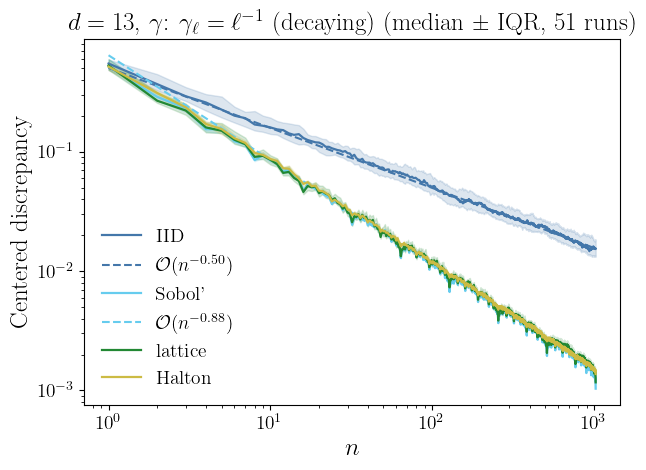

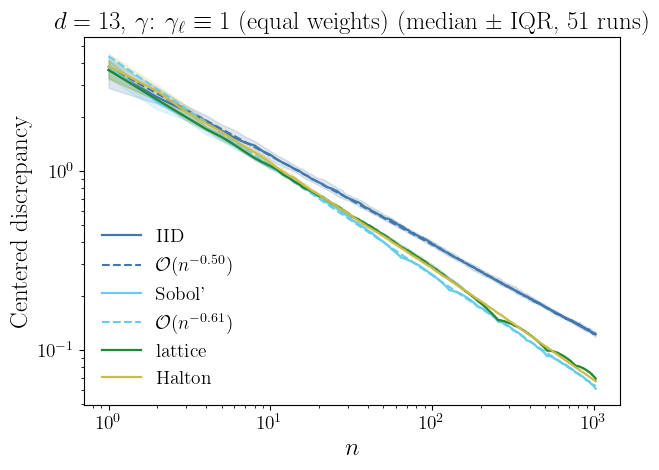

In [3]:
d      = 13   #dimension
n_max  = 2**10  #maximum sample size
n_rep  = 51  #number of replications
n_vals = np.arange(1, n_max + 1)
n_fit  = (max(5, n_max // 10), n_max)  #values of n to fit the trend line

lattice_rule_file = REPO_ROOT / "classlib" / "generators" / "lattice_rules" / "2exp20_9125dim_new_lattice_rule.txt"

gens = {
    "IID":     lambda n, d: np.random.default_rng().random((n, d)),
    "Sobol'":  lambda n, d: qp.Sobol(dimension=d).gen_samples(n),
    "lattice": lambda n, d: qp.Lattice(dimension=d, generating_vector=str(lattice_rule_file)).gen_samples(n),
    "Halton":  lambda n, d: qp.Halton(dimension=d).gen_samples(n),
}

def prefix_mmd(gen_pts, n, d, kernel, measure):
    """Centered discrepancy (MMD) for prefixes 1..n (returns MMD, not squared)."""
    X = gen_pts(n, d)
    return mmd_prefix_against_measure(X, kernel, measure, return_sqrt=True)

def run_reps(gen, n, d, kernel, measure, n_rep, desc=None):
    out = np.empty((n_rep, n), float)
    with tqdm(total=n_rep, desc=desc, file=sys.stdout, ascii=True, leave=True) as pbar:
        for r in range(n_rep):
            out[r] = prefix_mmd(gen, n, d, kernel, measure)
            pbar.update(1)
    return out

def simulate_and_plot_for_gamma(gamma, gamma_label=None):
    """Build kernel/measure for this γ, simulate all gens, and make one figure."""
    kernel  = make_cd_kernel(d, gamma)
    measure = CDUniformMeasure(d, gamma)

    # --- simulate & aggregate ---
    stats = {}
    for name, gen in gens.items():
        sims = run_reps(gen, n_max, d, kernel, measure, n_rep=n_rep, desc=f"{name} (γ={gamma_label})")
        med  = np.nanmedian(sims, axis=0)
        q25  = np.nanpercentile(sims, 25, axis=0)
        q75  = np.nanpercentile(sims, 75, axis=0)
        stats[name] = {"med": med, "q25": q25, "q75": q75}

    # --- plot one figure for this γ ---
    fig, ax = plt.subplots()

    for name, S in stats.items():
        med, q25, q75 = S["med"], S["q25"], S["q75"]
        (line,) = ax.loglog(n_vals, med, lw=1.6, label=name)
        ax.fill_between(n_vals, q25, q75, alpha=0.18, color=line.get_color())

        # Fit & overlay trend line
        if name in ("IID", "Sobol'"):
            mask = (n_vals >= n_fit[0]) & (n_vals <= n_fit[1]) & np.isfinite(med) & (med > 0)
            if np.count_nonzero(mask) >= 2:
                power, coef = nb.plot_log_trend_line(
                    ax=ax, x=n_vals, y=med, n_which=mask,
                    endpoints=(n_vals[0], n_vals[-1]), color=line.get_color()
                )
                stats[name]["power"], stats[name]["coef"] = power, coef

    ax.set_xlabel("$n$")
    ax.set_ylabel("Centered discrepancy")  # use “MMD$^2$” if you switch to return_sqrt=False
    gtxt = gamma_label if gamma_label is not None else "custom"
    ax.set_title(rf"$d={d}$, $\gamma$: {gtxt}  (median ± IQR, {n_rep} runs)")
    ax.legend(loc="lower left")
    plt.tight_layout()
    return fig, stats

# --- define the two γ profiles you want and run ---
gammas = [
    (np.arange(1, d+1)**-1.0, r"$\gamma_\ell = \ell^{-1}$  (decaying)"),
    (np.ones(d),              r"$\gamma_\ell \equiv 1$  (equal weights)"),
]

figs = []
all_stats = []
for g, g_label in gammas:
    fig, stats = simulate_and_plot_for_gamma(g, g_label)
    figs.append(fig)
    all_stats.append({"label": g_label, "stats": stats})

# At this point you’ll see two separate figures, one per γ choice.
# 'all_stats' holds med/IQR and any fitted (power, coef) per generator per γ.